In [67]:
import numpy as np
import os
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import matplotlib.pyplot as plt 
import seaborn as sns

#attributes/features
* buying - price of the car: vhigh, high, med, low
* maint - price of maintenance: vhigh, high, med, low
* doors - number of doors: 2, 3, 4, 5more
* persons - highest number of passengers that can be transported: 2, 4, more
* lug_boot - size of luggage compartment/boot: small, med, big
* safety - estimated safety of car: low, med, high
#label - car acceptibility:bad, acc

# Load Data

In [68]:
training_data = pd.read_csv("training_data.csv")
training_data

,cid,buying,maint,doors,persons,lug_boot,safety,label
0,0,vhigh,med,2,4,med,med,bad
1,1,low,med,3,4,small,high,acc
2,2,med,med,3,more,med,high,acc
3,3,med,low,4,2,big,med,bad
4,4,low,high,4,more,big,high,acc
...,...,...,...,...,...,...,...,...
295,295,vhigh,low,3,2,small,med,bad
296,296,vhigh,vhigh,5more,4,small,low,bad
297,297,med,vhigh,3,4,med,high,acc
298,298,high,high,4,4,med,high,acc


In [69]:
training_data = training_data.drop(['cid'],axis=1)
training_data.describe()

,buying,maint,doors,persons,lug_boot,safety,label
count,300,300,300,300,300,300,300
unique,4,4,4,3,3,3,2
top,low,low,2,more,big,high,bad
freq,115,92,85,114,113,131,150


In [70]:
training_data.label.value_counts()

label
bad    150
acc    150
Name: count, dtype: int64

# Data Preprocessing

In [71]:
y = training_data['label']
X = training_data.drop(['label'],axis=1)

In [72]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True
1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False
2,False,True,False,False,True,False,True,False,False,False,True,True,False,False,False
3,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,False,False,True,True,False,False,True,False,False,False,False,False,True,False,True
296,False,False,True,False,False,True,False,False,True,True,False,False,True,True,False
297,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False
298,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False


In [73]:
print(len(X_encoded.columns))
sorted(X_encoded.columns)


15


['buying_low',
 'buying_med',
 'buying_vhigh',
 'doors_3',
 'doors_4',
 'doors_5more',
 'lug_boot_med',
 'lug_boot_small',
 'maint_low',
 'maint_med',
 'maint_vhigh',
 'persons_4',
 'persons_more',
 'safety_low',
 'safety_med']

In [74]:
da = tree.DecisionTreeClassifier(criterion='entropy')
da.fit(X_encoded, y)
print(f"# of leaf nodes: {da.get_n_leaves()}")
print(f"Max depth: {da.get_depth()}")

# of leaf nodes: 37
Max depth: 10


In [75]:
# test_size
#If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. 
#If int, represents the absolute number of test samples.

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.3, random_state = 42)

In [76]:
X_train.shape, X_test.shape

((210, 15), (90, 15))

In [77]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
print(f"# of leaf nodes: {dt.get_n_leaves()}")
print(f"Max depth: {dt.get_depth()}")

# of leaf nodes: 29
Max depth: 9


In [121]:
# print the scores on training and test set

print('Training Error: {:.4f}'.format(1-dt.score(X_train, y_train)))
print('Test Error: {:.4f}'.format(1-dt.score(X_test, y_test)))

Training Error: 0.0000
Test Error: 0.0778


In [79]:
tree1=dt.tree_
feature_names = X_train.columns
for i in range(tree1.node_count):
    if tree1.children_left[i] != tree1.children_right[i]:  
        feature = tree1.feature[i]
        threshold = tree1.threshold[i]
        feature_name = feature_names[feature]
        print(f"Internal Node Index: {i}")
        print(f" feature_name: {feature_name}")
        print(f" split threshold: {threshold}")
        print("-" * 30)


Internal Node Index: 0
 feature_name: safety_low
 split threshold: 0.5
------------------------------
Internal Node Index: 1
 feature_name: buying_vhigh
 split threshold: 0.5
------------------------------
Internal Node Index: 2
 feature_name: maint_vhigh
 split threshold: 0.5
------------------------------
Internal Node Index: 3
 feature_name: persons_4
 split threshold: 0.5
------------------------------
Internal Node Index: 4
 feature_name: persons_more
 split threshold: 0.5
------------------------------
Internal Node Index: 6
 feature_name: lug_boot_small
 split threshold: 0.5
------------------------------
Internal Node Index: 8
 feature_name: doors_3
 split threshold: 0.5
------------------------------
Internal Node Index: 9
 feature_name: doors_5more
 split threshold: 0.5
------------------------------
Internal Node Index: 10
 feature_name: doors_4
 split threshold: 0.5
------------------------------
Internal Node Index: 15
 feature_name: safety_med
 split threshold: 0.5
------

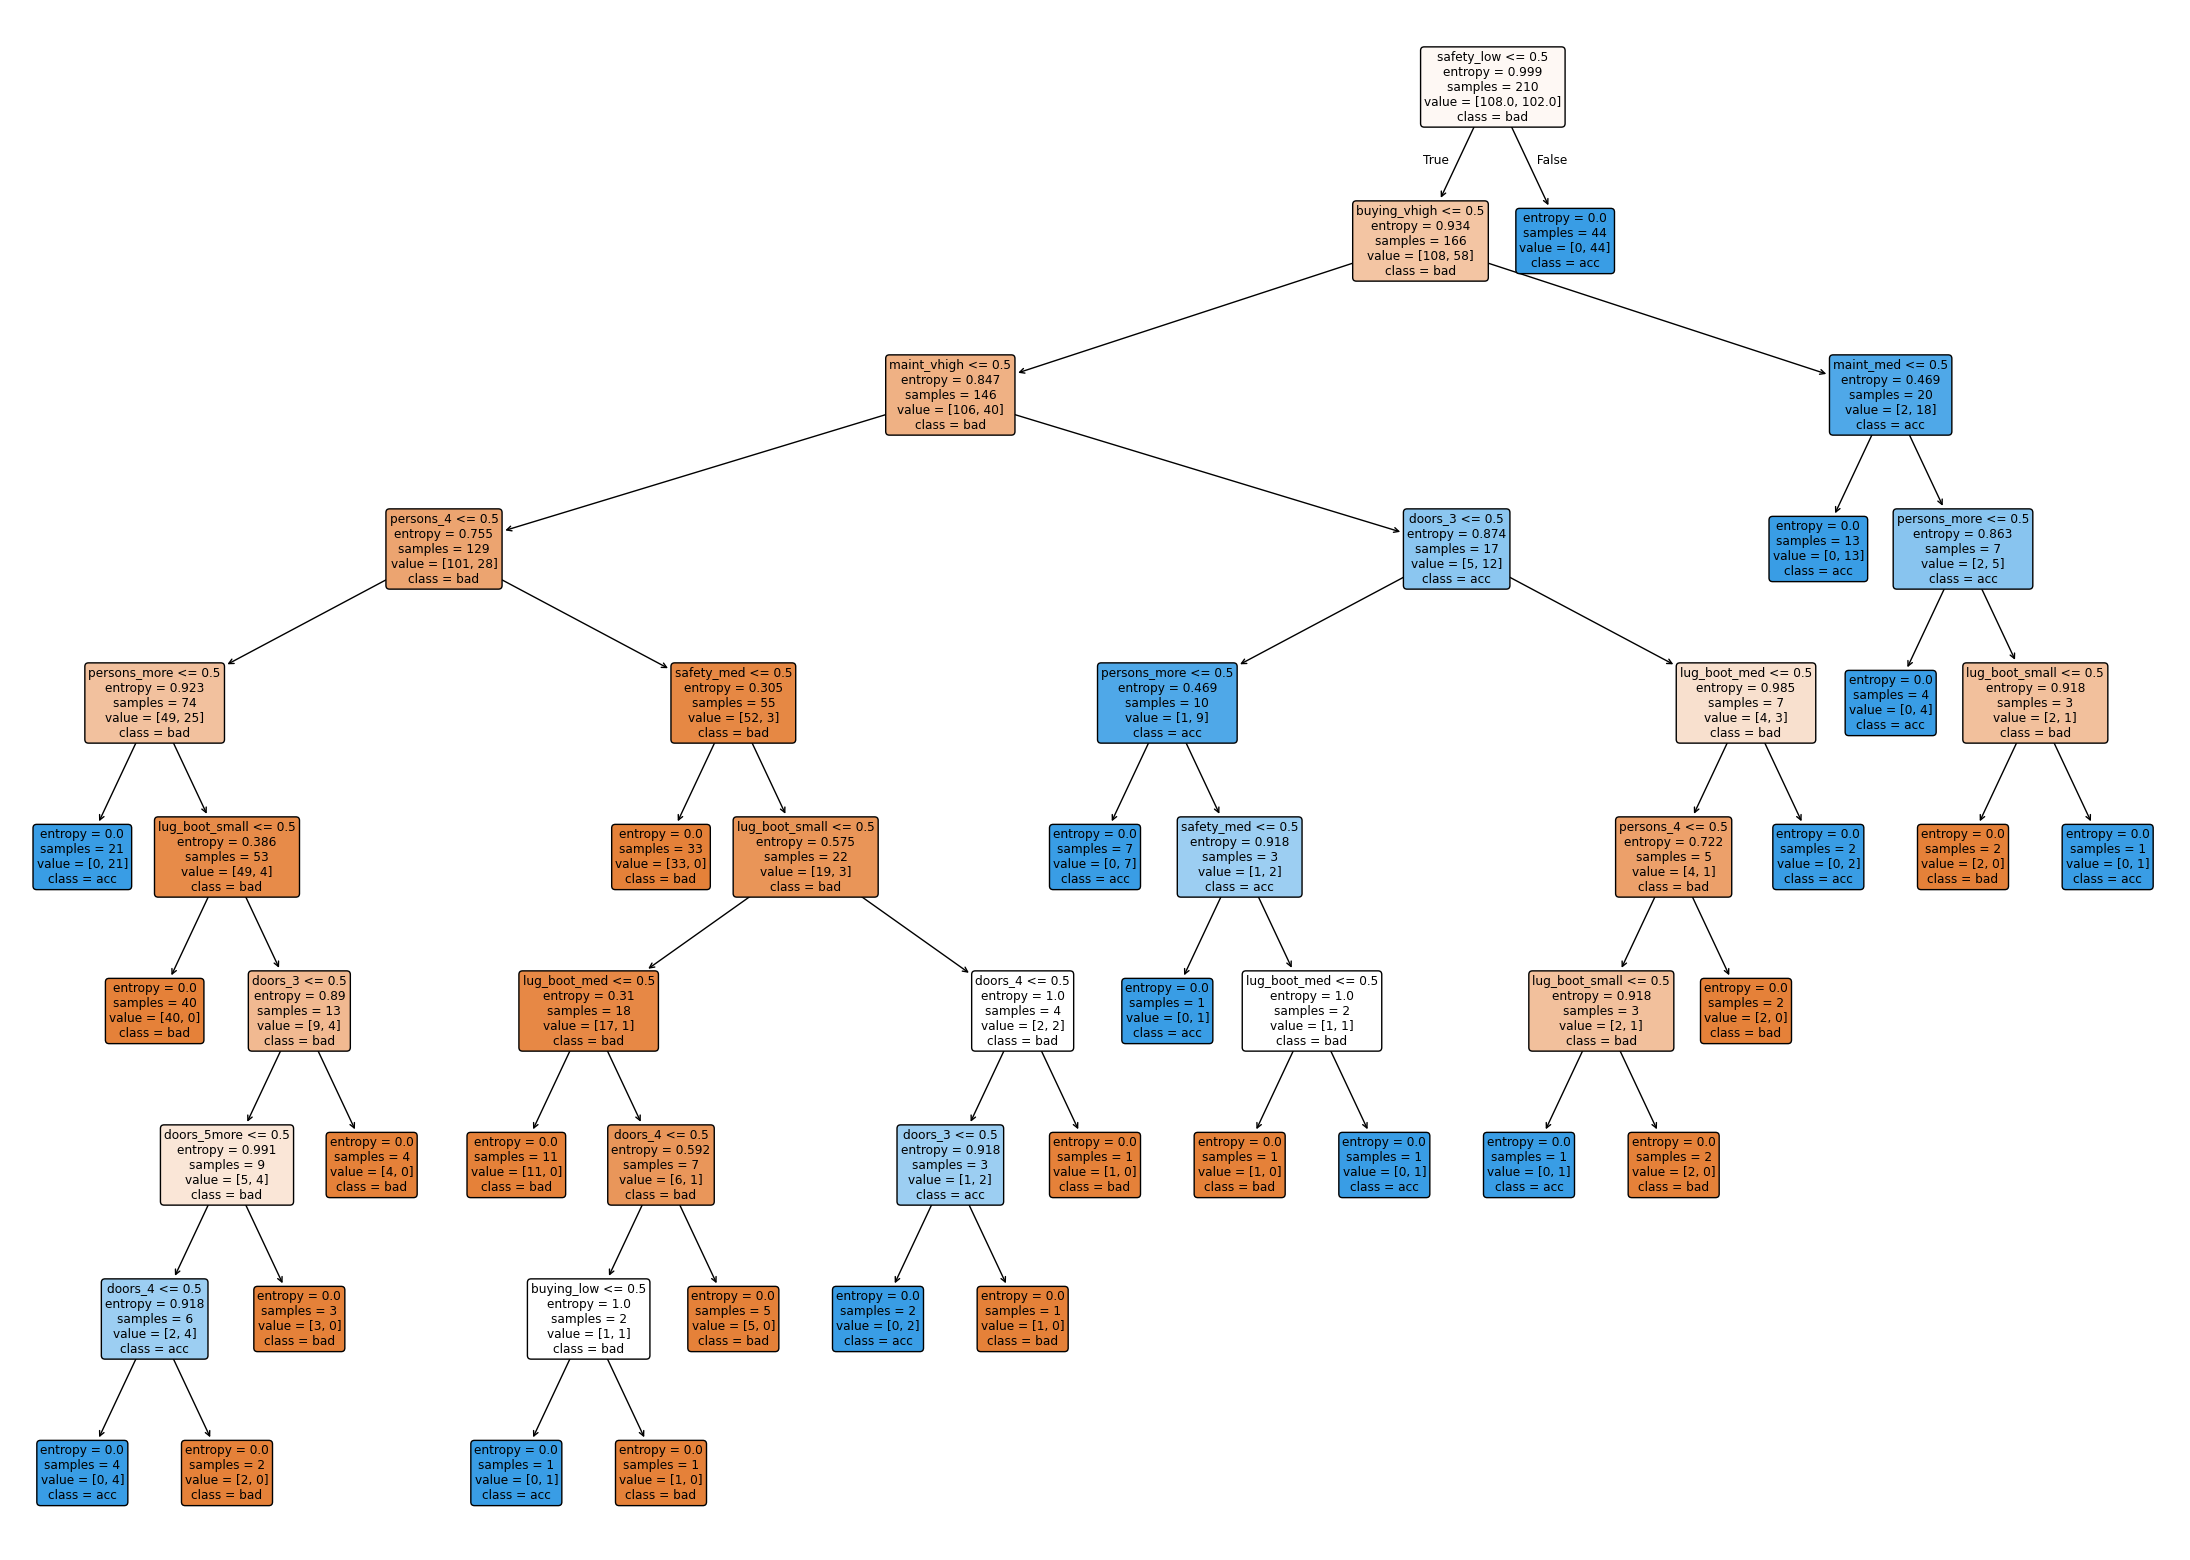

In [80]:
plt.figure(figsize=(28,20))
tree.plot_tree(dt.fit(X_train, y_train), 
               feature_names=X_encoded.columns,
               class_names=["bad","acc"],
               filled=True,
               rounded=True) 
plt.show()

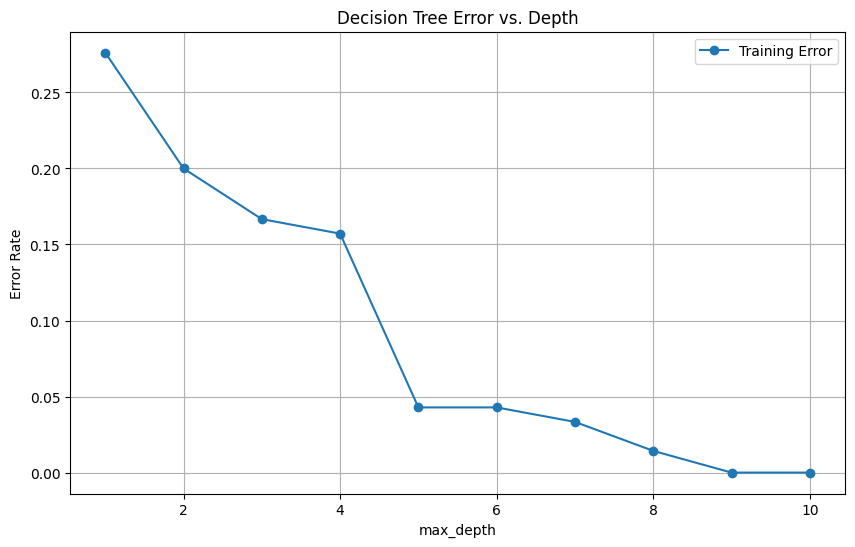

In [81]:
from sklearn.metrics import accuracy_score

train_errors = []


for depth in range(1, 11):
    dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    dt1.fit(X_train, y_train)

    
    train_acc = accuracy_score(y_train, dt1.predict(X_train))
    

    
    train_errors.append(1 - train_acc)
    


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_errors, marker='o', label='Training Error')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.title('Decision Tree Error vs. Depth')
plt.legend()
plt.grid(True)
plt.show()

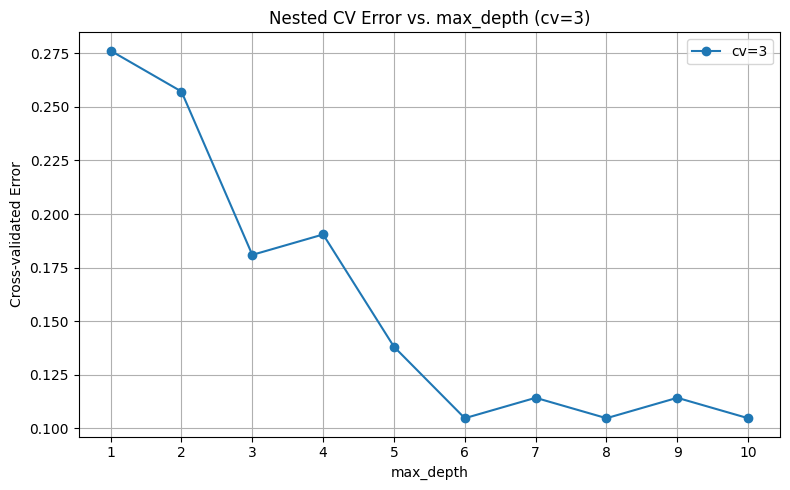

6

In [ ]:
depths = range(1, 11)
errors = []

for d in depths:
    dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    scores = cross_val_score(dt1, X_train, y_train, cv=3)
    error = 1 - np.average(scores)
    errors.append(error)
    

plt.plot(depths, errors, marker='o')
plt.xlabel("max_depth")
plt.ylabel("Cross-validated Error Rate")
plt.grid(True)
plt.show()


best_depth = depths[np.argmin(errors)]
print(f" max_depth: {best_depth}")


In [131]:
dt2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=6)
dt2.fit(X_train, y_train)
print(f"# of leaf nodes: {dt2.get_n_leaves()}")
print(f"Max depth: {dt2.get_depth()}")
print('Training Error: {:.4f}'.format(1-dt2.score(X_train, y_train)))
print('Test Error: {:.4f}'.format(1-dt2.score(X_test, y_test)))

# of leaf nodes: 17
Max depth: 6
Training Error: 0.0429
Test Error: 0.0778


In [138]:
test_df = pd.read_csv("P3_test.csv")
test_encoded = pd.get_dummies(test_df)

In [139]:
test_encoded = test_encoded[X_encoded.columns]  
y_pred = dt.predict(test_encoded)


submission = pd.DataFrame({
    "cid": test_df["cid"],
    "label": y_pred
})

submission.to_csv("submission.csv", index=False)